<a href="https://colab.research.google.com/github/furlancad/Varos_Brenno/blob/main/Otimiza%C3%A7%C3%A3o_de_Markowitz_e_a_fronteira_eficiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Harry Markowitz criou em 1952 uma teoria que analise o risco de uma carteira de investimento.
O objetivo do modelo é criar um portfólio que otimiza o risco-retorno dos investimentos disponíveis,
escolhendo os pesos ideais pra cada ativo na carteira.

In [25]:
!pip install -q pandas_datareader --upgrade

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from scipy.optimize import minimize
import matplotlib.ticker as mtick

import yfinance as yf

In [27]:
inicio = dt.datetime(2015, 1, 1)
final = dt.datetime(2022, 12, 31)

In [28]:
lista_acoes = ["WEGE3", "LREN3", "VALE3", "PETR4", "EQTL3", "EGIE3"]
lista_acoes = [acao + ".SA" for acao in lista_acoes]
#lista_acoes = ["AAPL", "NKE", "GOOGL", "AMZN"]

precos = yf.download(lista_acoes,inicio,final)['Adj Close']
precos.head()

[*********************100%%**********************]  6 of 6 completed


Ticker,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,
2015-01-02,14.298345,4.607600,9.231856,3.089933,12.060664,5.021036
2015-01-05,14.315886,4.431673,8.975216,2.825836,11.879300,5.055270
2015-01-06,14.605275,4.681321,9.078600,2.733402,12.355378,4.980280
2015-01-07,14.973585,4.641110,9.233075,2.862149,12.808790,4.923223
2015-01-08,15.127042,4.607600,9.244024,3.047016,12.944809,5.006364


In [ ]:
retornos = precos.pct_change().apply(lambda x: np.log(1+x)).dropna() #retorno logaritmo
media_retornos = retornos.mean()
matriz_cov = retornos.cov()


In [ ]:
#display(retornos)

In [ ]:
#display(media_retornos)

In [ ]:
#display(matriz_cov)

In [30]:
numero_carteiras = 100000
tabela_retornos_esperados = np.zeros(numero_carteiras)
tabela_volatilidades_esperadas = np.zeros(numero_carteiras)
tabela_sharpe = np.zeros(numero_carteiras)
tabela_pesos = np.zeros((numero_carteiras, len(lista_acoes)))

In [31]:
#display(tabela_retornos_esperados)

In [32]:
#display(tabela_volatilidades_esperadas)

In [33]:
#display(tabela_sharpe)

In [34]:
#display(tabela_pesos)

In [46]:
for k in range(numero_carteiras):

  pesos = np.random.random(len(lista_acoes))
  pesos = pesos/np.sum(pesos)
  tabela_pesos[k, :] = pesos

  tabela_retornos_esperados[k] = np.sum(media_retornos * pesos * 252)
  tabela_volatilidades_esperadas[k] =np.sqrt(np.dot(pesos.T, np.dot(matriz_cov*252, pesos)))

  tabela_sharpe[k] = tabela_retornos_esperados[k]/tabela_volatilidades_esperadas[k]

In [36]:
#display(pesos)

In [37]:
#display(tabela_pesos)

In [38]:
#display(tabela_retornos_esperados)

In [39]:
#display(tabela_volatilidades_esperadas)

In [40]:
#display(tabela_sharpe)

In [50]:
indice_do_sharpe_maximo = tabela_sharpe.argmax()
tabela_pesos[indice_do_sharpe_maximo]

array([0.0508215 , 0.47623905, 0.01445685, 0.01059434, 0.1641827 ,
       0.28370555])

In [51]:
#display(indice_do_sharpe_maximo)

85592

In [52]:
#display(tabela_pesos)

array([[0.01529542, 0.30929723, 0.22754017, 0.32557001, 0.10815648,
        0.01414069],
       [0.17107676, 0.11622741, 0.09391534, 0.28775689, 0.18317434,
        0.14784926],
       [0.23366283, 0.32534641, 0.12413559, 0.02430357, 0.08343962,
        0.20911198],
       ...,
       [0.14120665, 0.32761351, 0.2956341 , 0.10633558, 0.01031169,
        0.11889847],
       [0.10414701, 0.03776485, 0.25746587, 0.39458197, 0.17146813,
        0.03457217],
       [0.12794785, 0.21077227, 0.09367717, 0.38736785, 0.10067556,
        0.0795593 ]])

In [42]:
['WEGE3', 'LREN3', 'VALE3', 'PETR4', 'EQTL3', 'EGIE3']

['WEGE3', 'LREN3', 'VALE3', 'PETR4', 'EQTL3', 'EGIE3']

In [53]:
tabela_retornos_esperados_arit = np.exp(tabela_retornos_esperados) - 1
tabela_retornos_esperados_arit

array([0.21091945, 0.21844038, 0.20673042, ..., 0.18688215, 0.19664741,
       0.21902864])

In [54]:
eixo_y_fronteira_eficiente = np.linspace(tabela_retornos_esperados_arit.min(),
tabela_retornos_esperados_arit.max(), 50)

def pegando_retorno(peso_teste):
  peso_teste = np.array(peso_teste)
  retorno = np.sum(media_retornos * peso_teste) * 252
  retorno = np.exp(retorno) - 1

  return retorno

def checando_soma_pesos(peso_teste):

  return np.sum(peso_teste)-1

def pegando_vol(peso_teste):
  peso_teste = np.array(peso_teste)
  vol = np.sqrt(np.dot(peso_teste.T, np.dot(matriz_cov*252, peso_teste)))

  return vol

peso_inicial = [1/len(lista_acoes)] *len(lista_acoes)
limites = tuple([(0, 1) for ativo in lista_acoes])

eixo_x_fronteira_eficiente = []

for retorno_possivel in eixo_y_fronteira_eficiente:

  #vamos pegar a melhor volatilidade para cada retorno possível

  restricoes = ({'type':'eq', 'fun':checando_soma_pesos},
  {'type':'eq', 'fun': lambda w: pegando_retorno(w) - retorno_possivel})

  result = minimize(pegando_vol,peso_inicial,method='SLSQP', bounds=limites,
  constraints=restricoes)
  eixo_x_fronteira_eficiente.append(result['fun'])

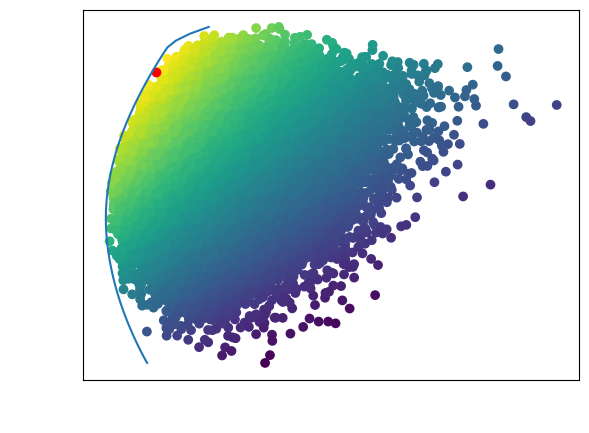

In [55]:
fig, ax = plt.subplots()

ax.scatter(tabela_volatilidades_esperadas, tabela_retornos_esperados_arit, c=tabela_sharpe)

plt.xlabel("Volatilidade esperada")
plt.ylabel("Retorno esperado")

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.scatter(tabela_volatilidades_esperadas[indice_do_sharpe_maximo],
           tabela_retornos_esperados_arit[indice_do_sharpe_maximo], c= "red")
ax.plot(eixo_x_fronteira_eficiente, eixo_y_fronteira_eficiente)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()